## Customer Analysis

#### Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
#### We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
#### Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.
#### Additionally, measure the AUC-ROC metric and compare it with the F1.

## Download and Prepare data.

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score
from sklearn.utils import shuffle
warnings.filterwarnings('ignore')

***All imports have been done

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


***Data Imported, and walked through dataset.

In [3]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

***Checked datatypes of each column, everything is good need not change any.

In [4]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

***Tenure column has 909 missing values, will replace missing values with -1.

In [5]:
data['Tenure'] = data['Tenure'].fillna(-1)
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

*** Filled missing values with -1.

### Observations from above Analysis : 

***1. The columns Surname, Geography, Gender are categorical columns, and rest of the columns are numerical. 
2. All columns have non-null values except Tenure column which is replaced by -1. 
3. There is no need to change datatypes.

### Training, Validation & Testing Set:

In [6]:
features = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
target = data['Exited']

In [7]:
features_ohe = pd.get_dummies(features, drop_first=True)
features_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0


In [8]:
features_i, features_test, target_i, target_test = train_test_split(features_ohe, target, test_size=0.2, random_state=12345, shuffle=True)
features_train, features_valid, target_train, target_valid = train_test_split(features_i, target_i, test_size=0.25, random_state=12345, shuffle=True)
print("Training Set Size", len(features_train), "\nValidation Set Size", len(features_valid), "\nTest Set Size", len(features_test))

Training Set Size 6000 
Validation Set Size 2000 
Test Set Size 2000


In [9]:
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,-0.134048,-0.078068,-0.137323,0.076163,0.816929,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,-1.661443,0.136391,-0.896909,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,-1.051795,0.358435,-0.896909,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,-0.746971,0.651725,-0.896909,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,0.777149,0.813110,0.816929,1,1,0.801922,0,0,0


In [11]:
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2358,0.175393,0.399118,-1.051795,1.385698,-0.896909,0,1,-1.466761,0,0,1
8463,-1.299609,0.971741,-0.746971,-1.232442,-0.896909,1,0,0.254415,0,1,1
163,0.711757,-0.268942,-0.746971,-1.232442,0.816929,1,1,0.122863,0,1,0
3074,-0.391916,0.494555,0.472325,0.672529,-0.896909,1,0,0.585847,1,0,0
5989,0.165078,1.353490,1.691621,0.536522,-0.896909,0,0,1.462457,0,0,0


In [12]:
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7867,-0.123733,0.685430,-0.442147,-1.232442,-0.896909,1,1,0.980212,0,1,0
1402,1.083087,-0.937002,1.081973,0.858518,-0.896909,1,0,-0.390486,0,0,1
8606,1.598822,0.303681,0.167501,-1.232442,0.816929,1,1,-0.435169,0,1,1
8885,0.165078,0.589993,-0.137323,0.412100,0.816929,1,1,1.017079,0,1,1
6494,0.484834,-1.032439,0.777149,-1.232442,0.816929,1,1,-1.343558,0,0,1


**Completed with prepare data step for training a model.

## 2. Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings

In [13]:
target_train.value_counts(normalize=True)

0    0.796833
1    0.203167
Name: Exited, dtype: float64

***We can say that, class 0 has almost 80% records while class 1 has 20% records

## 3. Train the model without taking into account the imbalance:

In [14]:
model = LogisticRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)

In [15]:
accuracy_score(target_valid, predictions)

0.8165

***Lets check accuracy for constant model as well

In [16]:
constant_predictions = pd.Series(0, index=target_valid.index)
accuracy_score(target_valid, constant_predictions)

0.8045

***Accuracy is not very high from constant model, it shows that our model is not learning much beacuse of weight imbalance

## 4. Improve the quality of the model:

***1. Make sure you use at least two approaches to fixing class imbalance.

In [17]:
features_one = features_train[target_train==1]
features_zero = features_train[target_train==0]
target_one = target_train[target_train==1]
target_zero = target_train[target_train==0]
print(len(features_one), len(features_zero))

1219 4781


#### 1. Upsampling

In [18]:
def upsampler(features_zero, features_one, target_zero, target_one, repeat):
    features_upsampled = pd.concat([features_zero]+[features_one]*repeat)
    target_upsampled = pd.concat([target_zero]+[target_one]*repeat)
    features_unsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_unsampled, target_upsampled

In [19]:
for repeat in range(1, 5):
    features_unsampled, target_upsampled = upsampler(features_zero, features_one, target_zero, target_one, repeat)
    model = LogisticRegression()
    model.fit(features_unsampled, target_upsampled)
    score = model.score(features_valid, target_valid)
    predicted_valid = model.predict(features_valid)
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Accuracy for Sample Size {}, repeat value {} | Score {:.3f}, Precision {:.3f}, Recall {:.3f}, F1 {:.3f}".format(
        len(features_unsampled), repeat, score, precision, recall, f1))

Accuracy for Sample Size 6000, repeat value 1 | Score 0.817, Precision 0.586, Recall 0.210, F1 0.309
Accuracy for Sample Size 7219, repeat value 2 | Score 0.808, Precision 0.510, Recall 0.468, F1 0.488
Accuracy for Sample Size 8438, repeat value 3 | Score 0.752, Precision 0.405, Recall 0.570, F1 0.474
Accuracy for Sample Size 9657, repeat value 4 | Score 0.706, Precision 0.367, Recall 0.696, F1 0.481


***With increase in sample size by UpSampling we are getting maximum F1 score at repeat value of 2, Precision and score decreases with increase in sample size and recall increases

***We can see that if we increases the size of features having class 1, accuracy is decreases so Upsampling doesn't seems to working



#### 2. Downsampling

In [20]:
def downsampler(features_zero, features_one, target_zero, target_one, fraction):
    feature_zero_sample = features_zero.sample(frac=fraction, random_state=12345)
    target_zero_sample = target_zero.sample(frac=fraction, random_state=12345)
    features_downsampled = pd.concat([feature_zero_sample]+[features_one])
    target_downsampled = pd.concat([target_zero_sample]+[target_one])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [21]:
for fraction in np.arange(0.2, 1.1, 0.1):
    features_downsampled, target_downsampled = downsampler(features_zero, features_one, target_zero, target_one, fraction)
    model = LogisticRegression()
    model.fit(features_downsampled, target_downsampled)
    score = model.score(features_valid, target_valid)
    predicted_valid = model.predict(features_valid)
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Accuracy for Sample Size {}, frac value {:.2f} | Score {:.3f}, Precision {:.3f}, Recall {:.3f}, F1 {:.3f} ".format(
    len(features_downsampled), fraction, score, precision, recall, f1))

Accuracy for Sample Size 2175, frac value 0.20 | Score 0.656, Precision 0.336, Recall 0.775, F1 0.468 
Accuracy for Sample Size 2653, frac value 0.30 | Score 0.737, Precision 0.394, Recall 0.642, F1 0.488 
Accuracy for Sample Size 3131, frac value 0.40 | Score 0.776, Precision 0.441, Recall 0.535, F1 0.483 
Accuracy for Sample Size 3610, frac value 0.50 | Score 0.805, Precision 0.503, Recall 0.483, F1 0.493 
Accuracy for Sample Size 4088, frac value 0.60 | Score 0.810, Precision 0.520, Recall 0.404, F1 0.455 
Accuracy for Sample Size 4566, frac value 0.70 | Score 0.812, Precision 0.528, Recall 0.358, F1 0.427 
Accuracy for Sample Size 5044, frac value 0.80 | Score 0.811, Precision 0.530, Recall 0.297, F1 0.380 
Accuracy for Sample Size 5522, frac value 0.90 | Score 0.814, Precision 0.553, Recall 0.240, F1 0.335 
Accuracy for Sample Size 6000, frac value 1.00 | Score 0.817, Precision 0.586, Recall 0.210, F1 0.309 


***For Downsampling, We are getting highest F1_score at frac = 0.3 with sample size 2653

#### 3. Thresholding

In [22]:
model = LogisticRegression()
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.9, 0.05):
    predicted_valid = probabilities_one_valid>threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 Score = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Precision = 0.196, Recall = 1.000, F1 Score = 0.327
Threshold = 0.05 | Precision = 0.218, Recall = 0.987, F1 Score = 0.357
Threshold = 0.10 | Precision = 0.266, Recall = 0.926, F1 Score = 0.413
Threshold = 0.15 | Precision = 0.314, Recall = 0.818, F1 Score = 0.454
Threshold = 0.20 | Precision = 0.358, Recall = 0.701, F1 Score = 0.474
Threshold = 0.25 | Precision = 0.398, Recall = 0.573, F1 Score = 0.470
Threshold = 0.30 | Precision = 0.463, Recall = 0.509, F1 Score = 0.485
Threshold = 0.35 | Precision = 0.521, Recall = 0.442, F1 Score = 0.479
Threshold = 0.40 | Precision = 0.537, Recall = 0.368, F1 Score = 0.437
Threshold = 0.45 | Precision = 0.517, Recall = 0.279, F1 Score = 0.362
Threshold = 0.50 | Precision = 0.586, Recall = 0.210, F1 Score = 0.309
Threshold = 0.55 | Precision = 0.626, Recall = 0.159, F1 Score = 0.253
Threshold = 0.60 | Precision = 0.606, Recall = 0.102, F1 Score = 0.175
Threshold = 0.65 | Precision = 0.676, Recall = 0.064, F1 Score = 0.117
Thresh

***We are getting best F1_Score = 0.488 at threshold = 0.3                                                                       
***With increase in the threshold Precision increases and Recall Decreases which is expected behaviour

### PR Curve:

In [23]:
model = LogisticRegression()
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

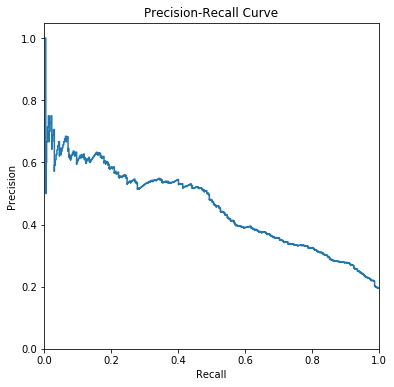

In [24]:
precision, recall, threshold = precision_recall_curve(target_valid, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

In [25]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.7707889922256361

***Our ROC Curve is like High Quality Model, it is better than a random model. our auc_roc value which is 0.77, its better than random model but still far from Perfect model having score 1

### 2. Train different models on training and validation sets.

***We will try LogisticRegression, RandomForestClassifier with F1_score as a matrix.

***Note: we are not using Decision Trees for testing because Random Forest, itself has multiple trees

#### LogisticRegression:

In [26]:
model = LogisticRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.30885122410546145

#### RandomForest:

In [27]:
for estimator in range(5, 55, 5):
    for depth in range(10, 25, 5):
        model = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        print("Estimators {}, Depth {} | F1 Score {:.3f}".format(estimator, depth, f1))

Estimators 5, Depth 10 | F1 Score 0.529
Estimators 5, Depth 15 | F1 Score 0.517
Estimators 5, Depth 20 | F1 Score 0.517
Estimators 10, Depth 10 | F1 Score 0.532
Estimators 10, Depth 15 | F1 Score 0.567
Estimators 10, Depth 20 | F1 Score 0.514
Estimators 15, Depth 10 | F1 Score 0.542
Estimators 15, Depth 15 | F1 Score 0.551
Estimators 15, Depth 20 | F1 Score 0.563
Estimators 20, Depth 10 | F1 Score 0.551
Estimators 20, Depth 15 | F1 Score 0.541
Estimators 20, Depth 20 | F1 Score 0.565
Estimators 25, Depth 10 | F1 Score 0.555
Estimators 25, Depth 15 | F1 Score 0.545
Estimators 25, Depth 20 | F1 Score 0.556
Estimators 30, Depth 10 | F1 Score 0.552
Estimators 30, Depth 15 | F1 Score 0.545
Estimators 30, Depth 20 | F1 Score 0.554
Estimators 35, Depth 10 | F1 Score 0.555
Estimators 35, Depth 15 | F1 Score 0.551
Estimators 35, Depth 20 | F1 Score 0.546
Estimators 40, Depth 10 | F1 Score 0.550
Estimators 40, Depth 15 | F1 Score 0.549
Estimators 40, Depth 20 | F1 Score 0.554
Estimators 45, Dept

***We can say that Using Random Forest Classifier gives better results compare to Logistic Regressor.

***Our best result is at Estimators 10, Depth 10 with F1 Score 0.562

## 5. Create Best Model:

***Lets create a best model with best parameters of Upsampling, Thresholding and Using RandomForestClassifier to get best results,

***We will train it on Training+Validation Combined Set

In [28]:
features_i[numeric]=scaler.transform(features_i[numeric])
features_i.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
454,1.093401,0.017370,0.472325,0.811201,-0.896909,0,1,-0.753945,0,0,0
8307,-0.350657,-0.841565,-0.442147,0.915286,-0.896909,1,1,-1.191821,0,0,1
4811,-0.794189,-1.223314,0.777149,-1.232442,0.816929,1,0,0.219064,0,1,0
1132,-0.247510,-0.173505,-1.661443,-1.232442,0.816929,1,1,1.248954,0,0,1
9640,1.010884,-0.364379,-0.442147,-1.232442,-0.896909,1,0,1.593627,0,0,0


In [29]:
n_features_one = features_i[target_i==1]
n_features_zero = features_i[target_i==0]
n_target_one = target_i[target_i==1]
n_target_zero = target_i[target_i==0]
print(len(n_features_one), len(n_features_zero))

1610 6390


In [30]:
#lets get Upsampled dataset with repeat=2, since we were getting the higher f1 score for it
features_upsampled, target_upsampled = upsampler(n_features_zero, n_features_one, n_target_zero, n_target_one, 2)
print("Upsampled dataset size", len(features_upsampled))
#lets get Downsampled dataset with fraction = 0.3, since we were getting the higher f1 score for it
features_downsampled, target_downsampled = downsampler(n_features_zero, n_features_one, n_target_zero, n_target_one, 0.3)
print("Downsampled Dataset size", len(features_downsampled))

Upsampled dataset size 9610
Downsampled Dataset size 3527


#### Downsampling with Thresholding:

In [31]:
d_model = RandomForestClassifier(n_estimators=40, max_depth=15, random_state=12345)
d_model.fit(features_downsampled, target_downsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [32]:
# we will take threshold value for prediction = 0.3, since it was giving better f1_score
probabilities_test = d_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test>0.3
f1_score(target_test, predicted_test)

0.520904729266621

#### Upsampling with Thresholding:

In [33]:
u_model = RandomForestClassifier(n_estimators=40, max_depth=15, random_state=12345)
u_model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [34]:
probabilities_test = u_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# we will take threshold value for prediction = 0.3, since it was giving better f1_score
predicted_test = probabilities_one_test>0.3
f1_score(target_test, predicted_test)

0.6116027531956735

In [35]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)
auc_roc

0.8580279630950272

## Final Conclusion:

We can say that our auc_roc value which is 0.858, is higher than our previous auc_roc value which was 0.77. We are making our model a little perfect.
Model Trained Upsampled Dataset gives us better results compare to Downsampled Dataset